In [4]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [43]:
# Load cleaned data exported from Data Cleaning Ipython Notebook

data = pd.read_csv(r'C:\Users\alsherman\Desktop\GitHub\DataScience_GeneralAssembly\Data\Cleaned_Data_May_17.csv')

In [6]:
data.describe()

,ID,latitude,location_data_accuracy,longitude,average_image_size,bedroom,cat,dog,image_number,price,...,square_footage,grocery_list,gym_list,movie_theatre_list,train_station_list,airport_list,subway_station_list,Barnes_and_Nobles_list,Deloitte_list,Starbucks_list
count,4.105000e+03,4105.000000,4105.000000,4105.000000,4105.000000,4105.000000,4105,4105,4105.000000,4105.000000,...,4105.000000,4105.000000,4105.000000,4105.000000,4105.000000,4105,4105.000000,4105.000000,4105.000000,4105.000000
mean,4.989281e+09,30.350735,1.463337,-60.146224,214092.570037,1.979537,0,0,9.176614,1892.733009,...,1172.067027,9.770280,6.551766,1.023630,2.093788,0,1.403410,0.162241,0.589038,3.264312
std,1.327768e+07,16.201643,4.825632,32.129647,109417.923016,1.224375,0,0,7.621897,801.741578,...,536.728287,8.218068,7.037377,1.659833,3.864635,0,2.921152,0.490640,1.284344,4.952115
min,4.959352e+09,-85.050342,0.000000,-96.045800,0.000000,0.000000,0,0,0.000000,2.000000,...,20.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
25%,4.976029e+09,38.719200,0.000000,-77.120848,270000.000000,1.000000,0,0,3.000000,1465.000000,...,820.000000,1.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
50%,4.991315e+09,38.860195,0.000000,-77.051425,270000.000000,2.000000,0,0,8.000000,1750.000000,...,1172.067027,9.000000,4.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,1.000000
75%,5.001991e+09,38.936759,0.000000,-76.843400,270000.000000,3.000000,0,0,14.000000,2175.000000,...,1295.000000,19.000000,12.000000,2.000000,3.000000,0,2.000000,0.000000,0.000000,4.000000
max,5.005417e+09,41.333300,22.000000,179.992769,270000.000000,6.000000,0,0,24.000000,9851.000000,...,10000.000000,20.000000,20.000000,9.000000,20.000000,0,18.000000,3.000000,6.000000,20.000000


In [7]:
# Airport field consists of only 0 (no listing is near an airport according to Google Places API data)
# Remove this variable as it provides no value

data.drop('airport_list', axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002A31AFD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002B432240>]], dtype=object)

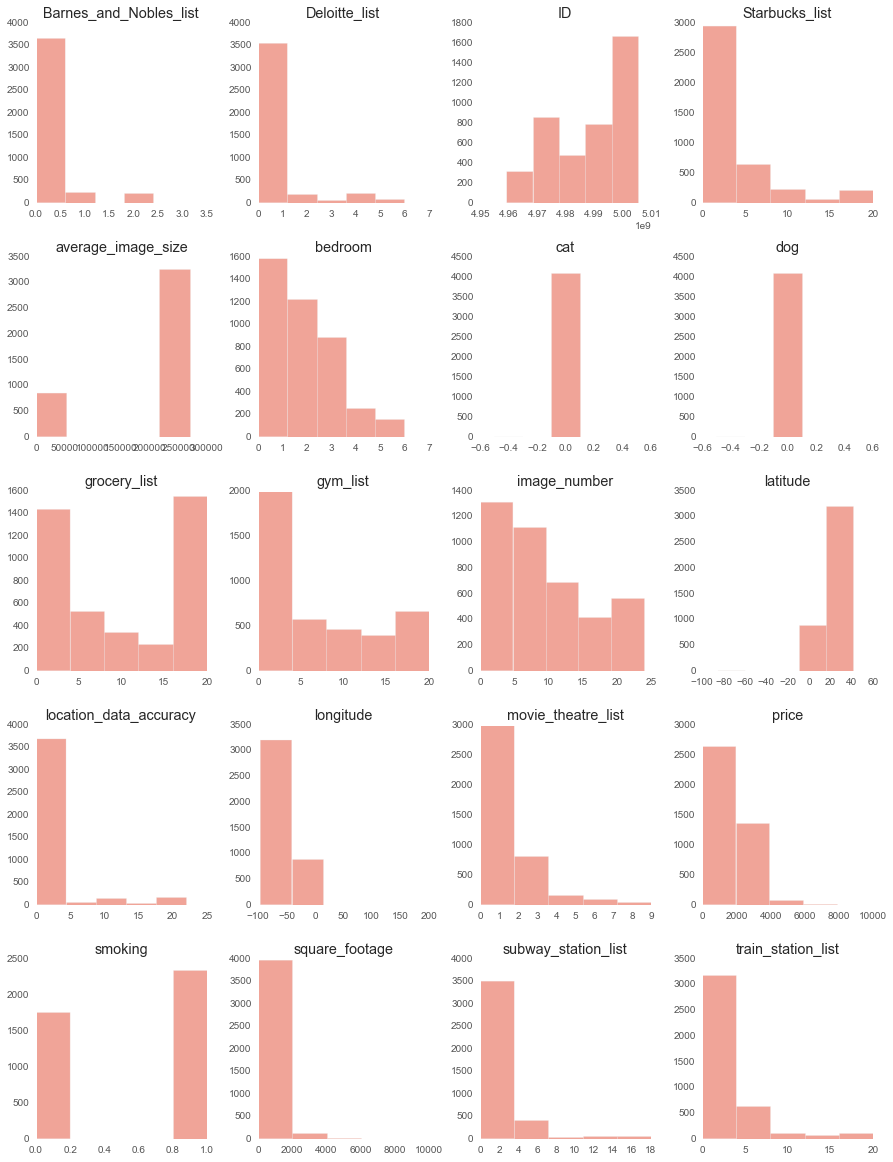

In [20]:
# Create a histogram to show the distribution in each variable

data.hist(alpha=0.5, bins=5, figsize=(15, 20))

In [12]:
# Create visualization plotting each field by price to determine which fields have instances with significant 
# differences in price

def visualize_all_fields_by_price(field):
    # Remove outliers for latitude and longitude
    if field == 'longitude':
        data[(data.longitude < -76.5) & (data.longitude > -78)].groupby('longitude')[['price']].mean().plot(figsize=(15, 2))
    elif field == 'latitude':
        data[(data.latitude > 38) & (data.latitude < 40)].groupby('latitude')[['price']].mean().plot(figsize=(15, 2))  
    
    # Avoid plotting price by price (itself)
    elif field == 'price': pass 
    
    # Text descriptions do not have categories to visualize
    elif field == 'description': pass
    elif field == 'url': pass
    
    else:
        data.groupby(field)[['price']].mean().plot(figsize=(15, 2))

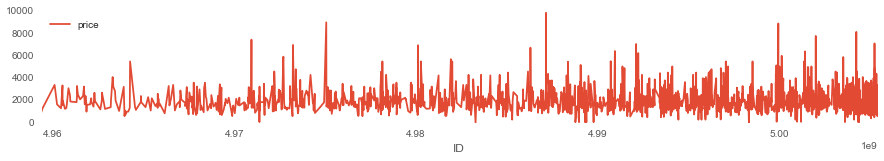

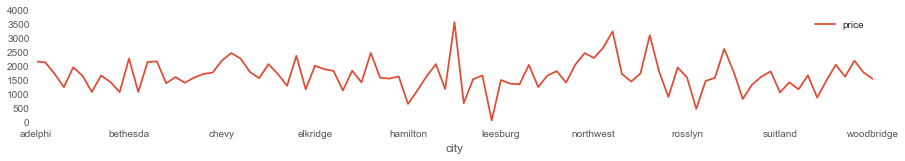

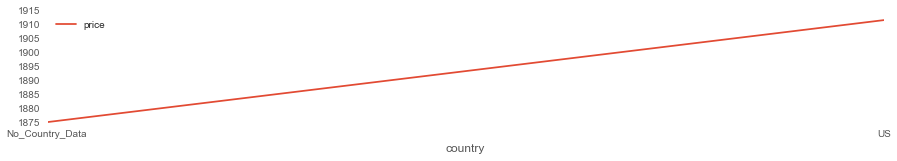

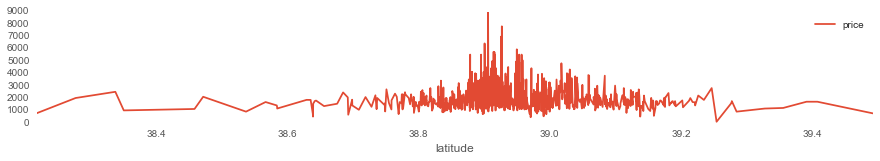

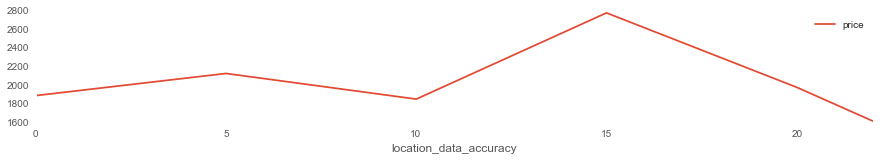

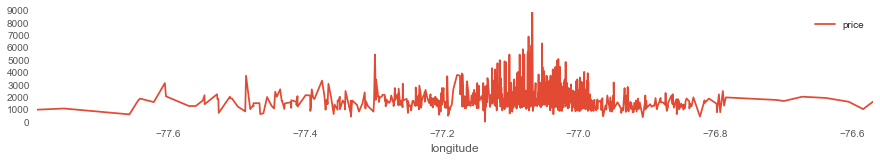

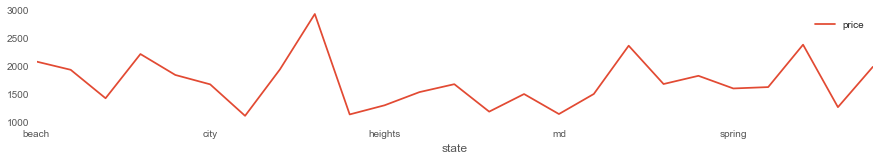

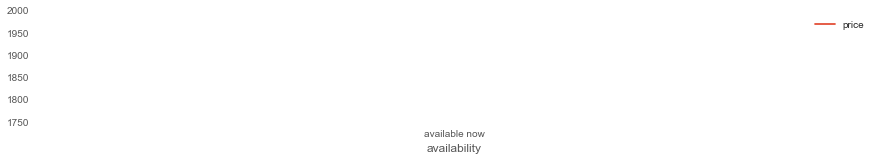

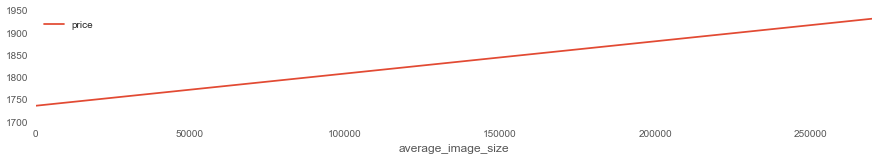

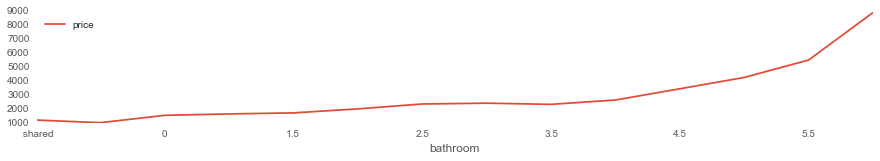

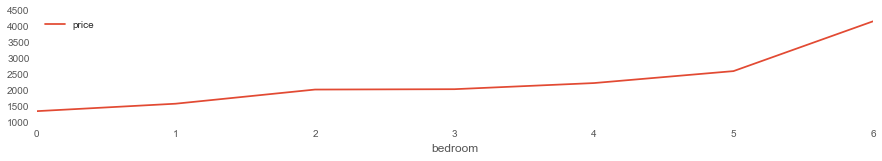

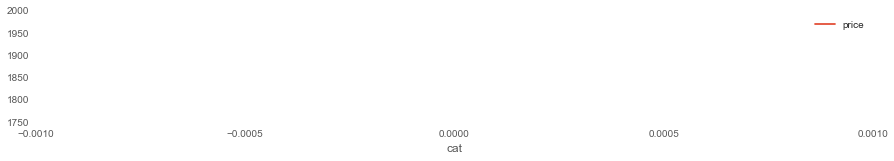

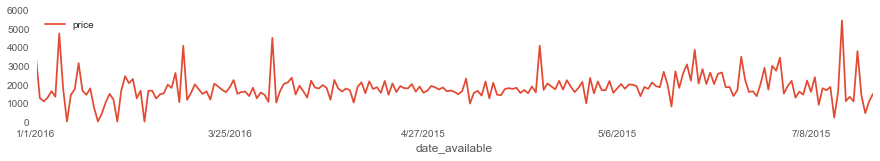

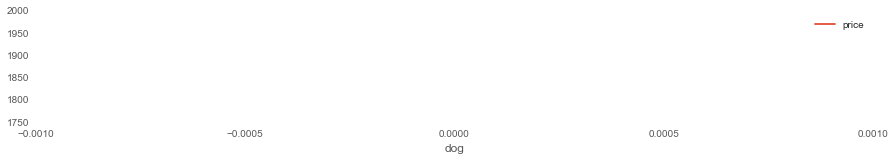

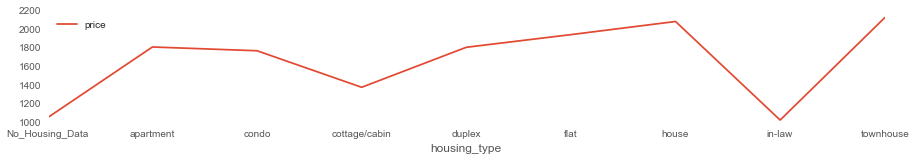

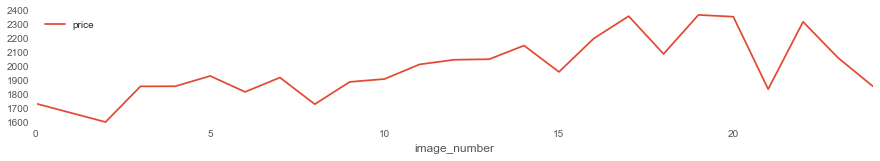

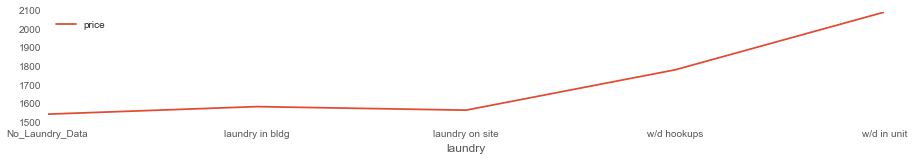

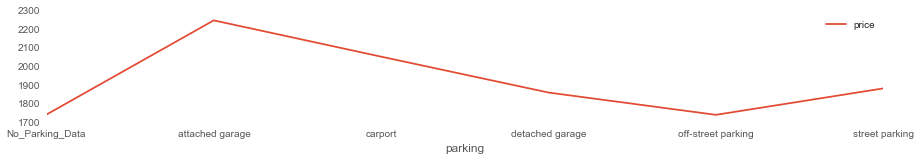

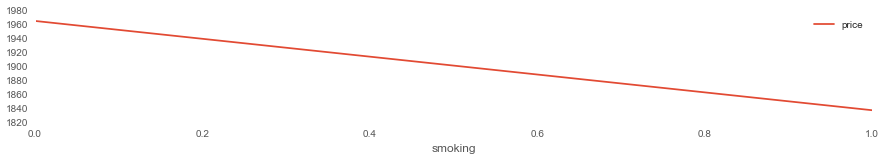

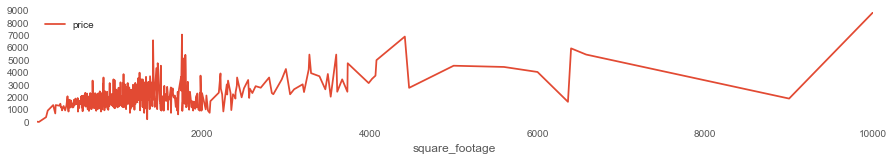

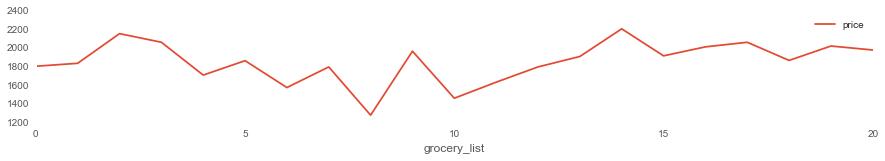

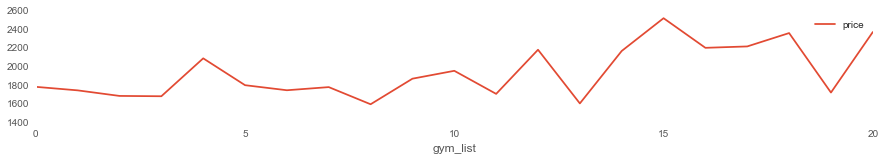

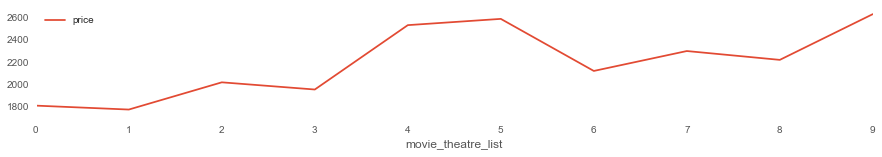

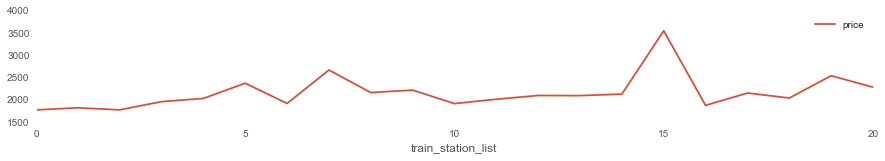

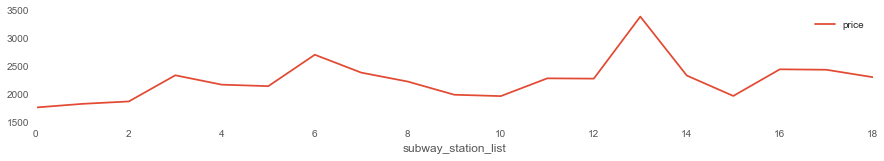

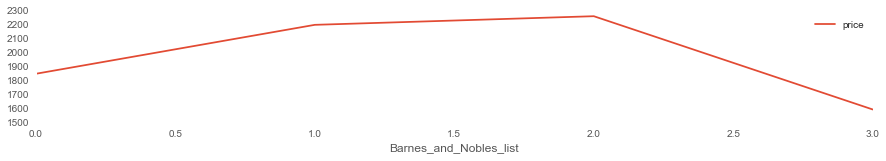

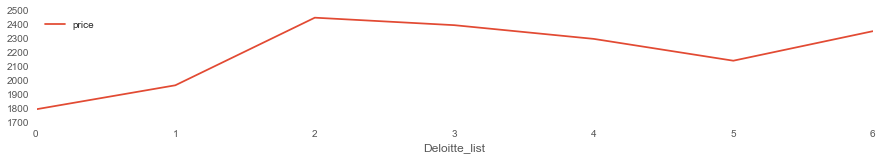

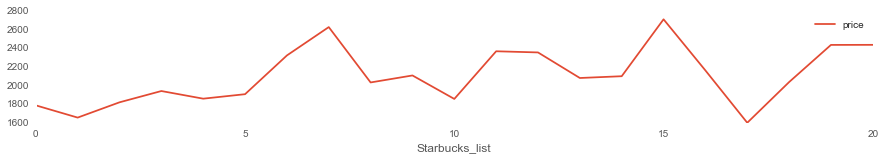

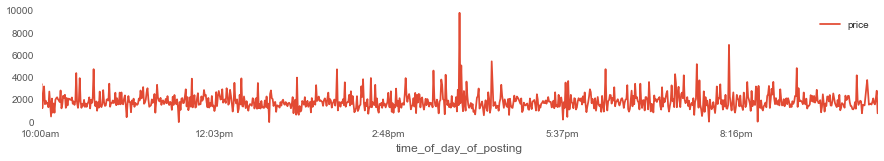

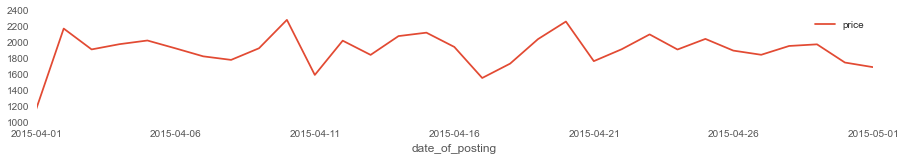

In [13]:
# View the visualizations from visualize_all_fields_by_price

for field in data.columns:
    visualize_all_fields_by_price(field)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000005A3B8B70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000005A314B38>]], dtype=object)

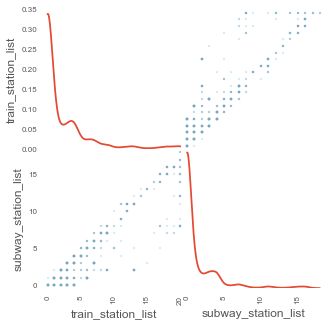

In [52]:
# Create a scatter matrix to view the correlation between Google Places API data for subways and train stations

scatter_matrix(data[[u'train_station_list',u'subway_station_list']], alpha=0.2, figsize=(5, 5), diagonal='kde')

In [35]:
# Drop train_station_list as it is correlated with subway_station_list

data.drop('train_station_list', axis=1, inplace=True)

In [65]:
data.to_csv(r'C:\Users\alsherman\Desktop\GitHub\DataScience_GeneralAssembly\Data\Cleaned_Data_May_18.csv')